In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


câu 1

In [ ]:
print('Nguyễn Thị Tường Vi - 6351071077')
columns = ["age","workclass","fnlwgt","education","education_num","marital_status",
           "occupation","relationship","race","sex","capital_gain","capital_loss",
           "hours_per_week","native_country","income"]

df_train = pd.read_csv(r'c:\Users\PC\Downloads\adult.data.csv', header=None, names=columns, skipinitialspace=True)
df_test  = pd.read_csv(r'c:\Users\PC\Downloads\adult.test.csv', header=None, names=columns, skipinitialspace=True, comment='|')

print("Số lượng dữ liệu huấn luyện:", df_train.shape)
print("Số lượng dữ liệu kiểm thử  :", df_test.shape)

Nguyễn Thị Tường Vi - 6351071077
Số lượng dữ liệu huấn luyện: (32562, 15)
Số lượng dữ liệu kiểm thử  : (16282, 15)


câu 2 - tiền xử lý dữ liệu

In [93]:
print('Nguyễn Thị Tường Vi - 6351071077')

df_train = df_train.replace('?', pd.NA).dropna()
df_test  = df_test.replace('?', pd.NA).dropna()

df_train = df_train.drop(columns=["fnlwgt"])
df_test  = df_test.drop(columns=["fnlwgt"])

df_train["income"] = df_train["income"].astype(str).str.strip()
df_test["income"]  = df_test["income"].astype(str).str.strip().str.rstrip('.')

data = pd.concat([df_train, df_test], ignore_index=True)

data.info()


Nguyễn Thị Tường Vi - 6351071077
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30163 entries, 0 to 30162
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30163 non-null  object
 1   workclass       30163 non-null  object
 2   education       30163 non-null  object
 3   education_num   30163 non-null  object
 4   marital_status  30163 non-null  object
 5   occupation      30163 non-null  object
 6   relationship    30163 non-null  object
 7   race            30163 non-null  object
 8   sex             30163 non-null  object
 9   capital_gain    30163 non-null  object
 10  capital_loss    30163 non-null  object
 11  hours_per_week  30163 non-null  object
 12  native_country  30163 non-null  object
 13  income          30163 non-null  object
dtypes: object(14)
memory usage: 3.2+ MB


câu 3 khảo sát độ tương đồng giưa các cột với nhau bằng công thức Pearson

Nguyễn Thị Tường Vi


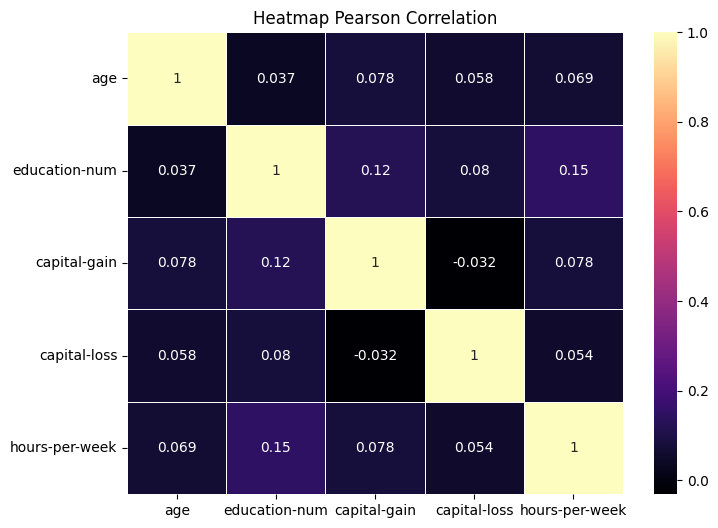

In [78]:
print('Nguyễn Thị Tường Vi')

cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
corr = df[cols].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='magma', annot=True, linewidths=0.5)
plt.title('Heatmap Pearson Correlation')
plt.show()




In [84]:
features = data.drop('income', axis=1)
labels = data['income']   

câu 5 

In [87]:
print('Nguyễn Thị Tường Vi - 6351071077')

features.select_dtypes(exclude=['number']).columns



Nguyễn Thị Tường Vi - 6351071077


Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [89]:
print('Nguyễn Thị Tường Vi - 6351071077')

# 1. Xác định cột Income (tên có thể khác)
label_col = [c for c in data.columns if 'income' in c.lower()][0]

# 2. Tách features & labels
labels = data[label_col]
features = data.drop(label_col, axis=1)

# 3. Chọn các cột object để one-hot
cat_cols = features.select_dtypes(include=['object', 'category']).columns

# 4. One-hot encoding
features_onehot = pd.get_dummies(features, columns=cat_cols)

# 5. Ép tất cả True/False → 1/0
features_onehot = features_onehot.astype(int)

# Kiểm tra kết quả
print(features_onehot.head())
print(features_onehot.dtypes)


Nguyễn Thị Tường Vi - 6351071077
   age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   age_26  ...  native_country_Puerto-Rico  native_country_Scotland  \
0       0  ...                           0                        0   
1       0  ...                           0                        0   
2       0  ...                           0                        0   
3       0  ...                           0                        0   
4       0  ...                           0                        0   

   native_country_South  native_country_Taiwan  native_country_Thailand  \
0 

In [106]:
print('Nguyễn Thị Tường Vi - 6351071077')
X_train = features_onehot[:32562]
X_test = features_onehot[16282:]
y_train = labels[:32562]
y_test = labels[16282:]



Nguyễn Thị Tường Vi - 6351071077


In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [108]:
print('Nguyễn Thị Tường Vi - 6351071077')

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)


Nguyễn Thị Tường Vi - 6351071077


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [111]:
from sklearn import metrics

In [112]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print('Nguyễn Thị Tường Vi - 6351071077')
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))



Nguyễn Thị Tường Vi - 6351071077
Accuracy: 0.9757942511346445
Report:               precision    recall  f1-score   support

       <=50K       0.97      0.99      0.98     10386
        >50K       0.98      0.92      0.95      3495

    accuracy                           0.98     13881
   macro avg       0.98      0.96      0.97     13881
weighted avg       0.98      0.98      0.98     13881



In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred

Nguyễn Thị Tường Vi


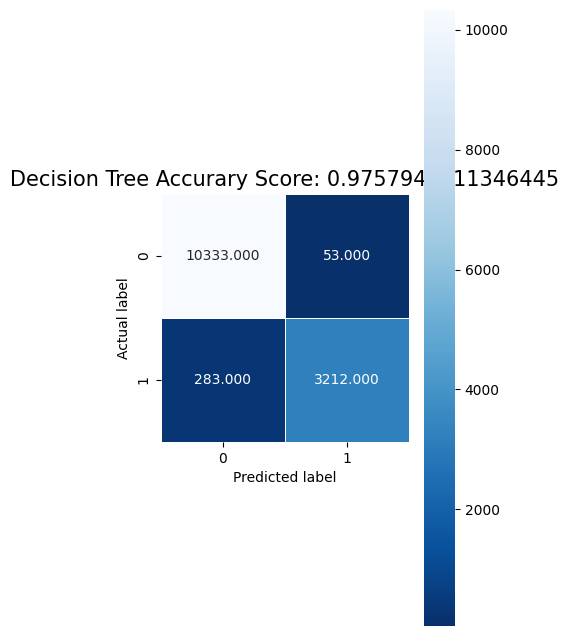

In [119]:
print('Nguyễn Thị Tường Vi')
plt.figure(figsize=(4, 8))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accurary Score: {0}' .format(tree_score)
plt.title(title, size = 15);

Nguyễn Thị Tường Vi - 6351071077


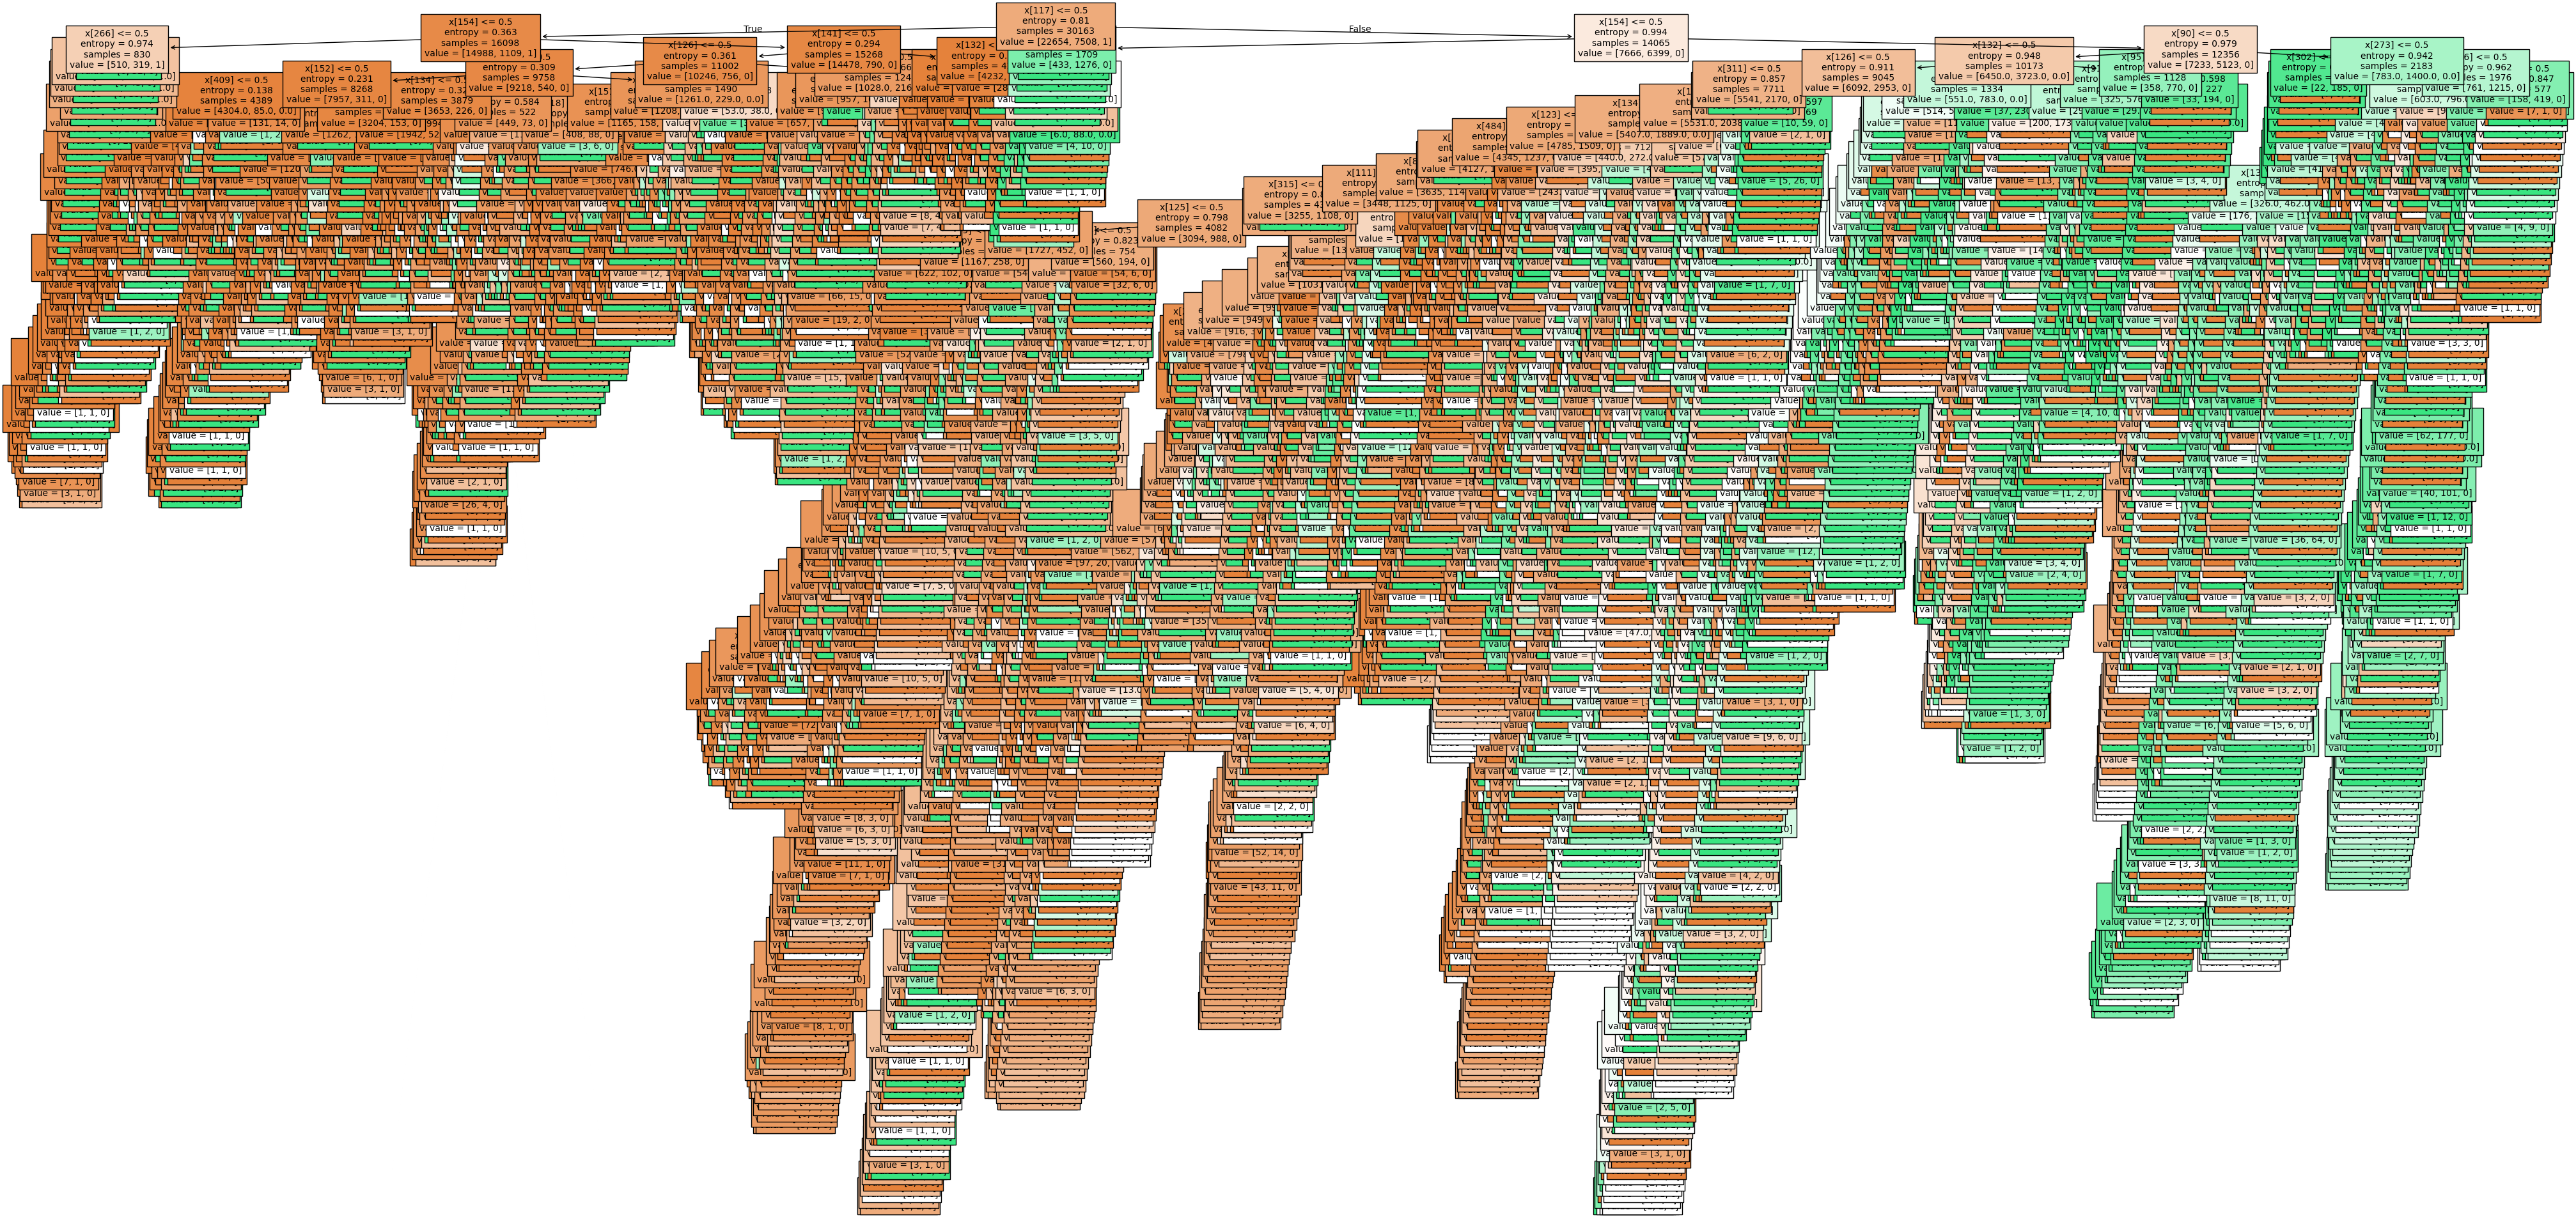

In [121]:
print('Nguyễn Thị Tường Vi - 6351071077')
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

Mô hình Decision Tree với criterion='gini' đã được huấn luyện.
Dự đoán trên tập kiểm tra đã hoàn tất.
Decision Tree Accuracy Score (criterion='gini'): 0.9758

Confusion Matrix (criterion='gini'):
[[10333    53]
 [  283  3212]]


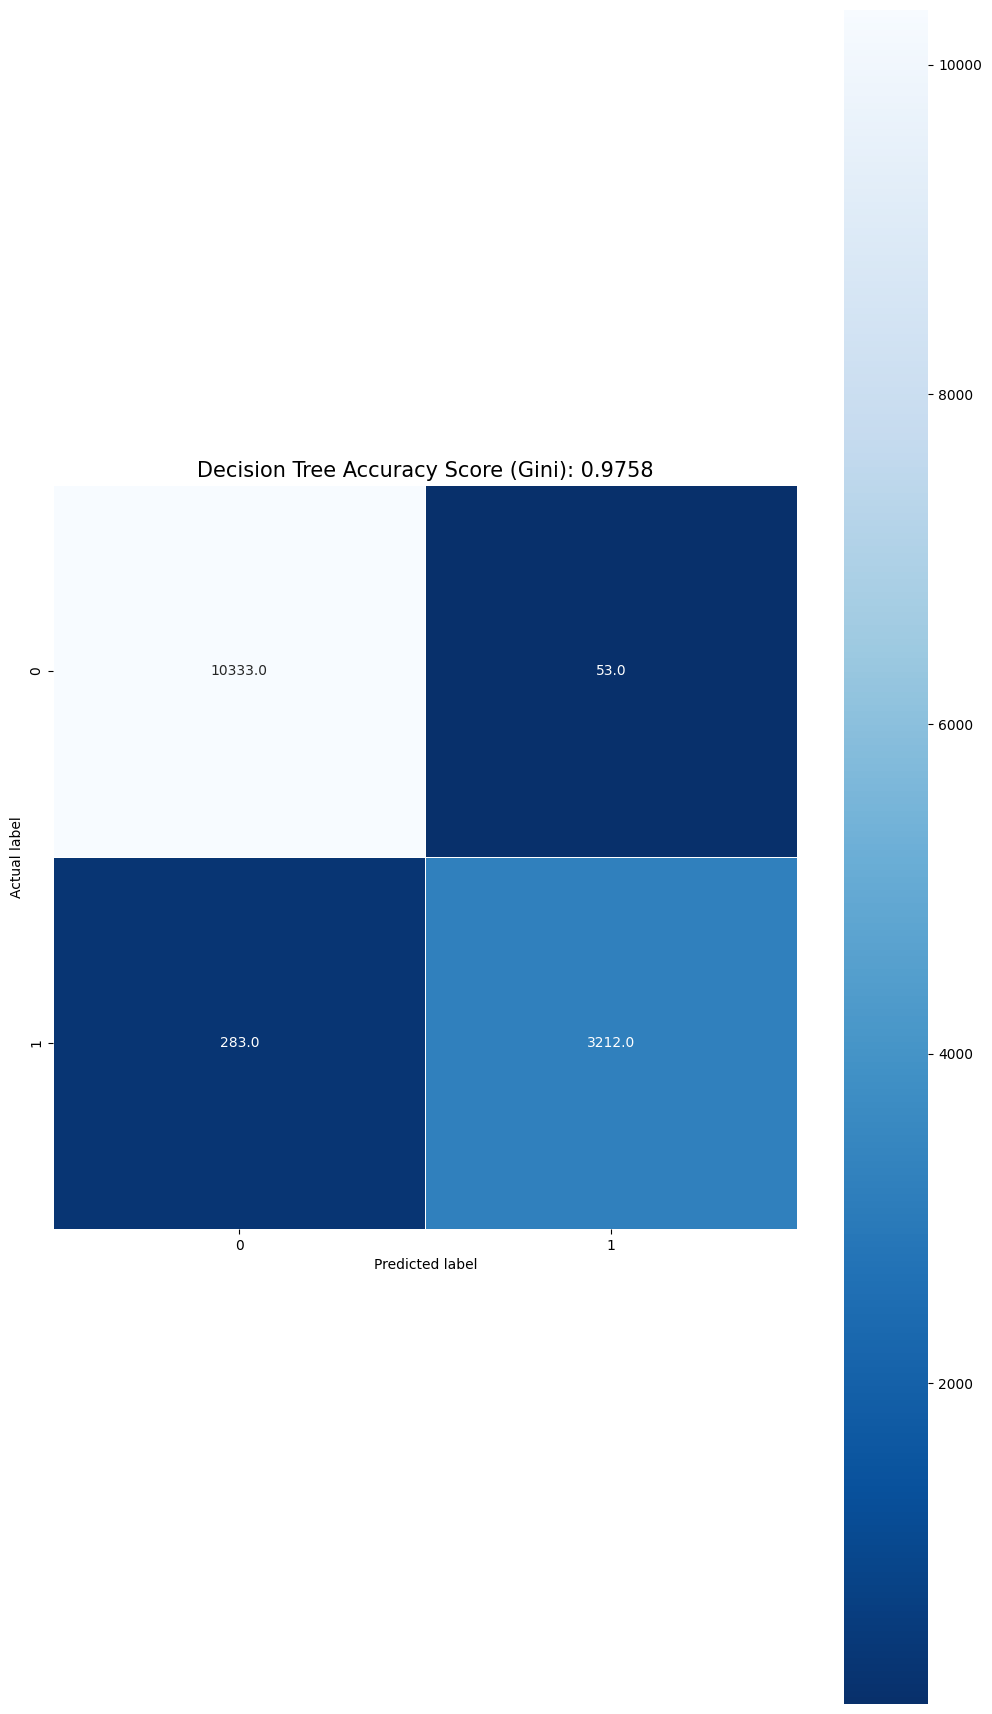

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 

tree_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

tree_model_gini.fit(X_train, y_train)

print("Mô hình Decision Tree với criterion='gini' đã được huấn luyện.")

y_pred_gini = tree_model_gini.predict(X_test)

print("Dự đoán trên tập kiểm tra đã hoàn tất.")
from sklearn.metrics import confusion_matrix

tree_score_gini = accuracy_score(y_test, y_pred_gini)
print(f"Decision Tree Accuracy Score (criterion='gini'): {tree_score_gini:.4f}")

tree_cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion Matrix (criterion='gini'):")
print(tree_cm_gini)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,22))

sns.heatmap(tree_cm_gini, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score (Gini): {0:.4f}' .format(tree_score_gini)
plt.title(title, size = 15);
plt.show()

câu 9

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
print('Nguyễn Thị Tường Vi -6351071077')
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train , y_train).predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred) 

print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Nguyễn Thị Tường Vi -6351071077
Accuracy: 0.4158922267848138
Report:               precision    recall  f1-score   support

       <=50K       0.99      0.22      0.36     10386
        >50K       0.30      0.99      0.46      3495

    accuracy                           0.42     13881
   macro avg       0.65      0.61      0.41     13881
weighted avg       0.82      0.42      0.39     13881



Nguyễn Thị Tường Vi - 6351071077


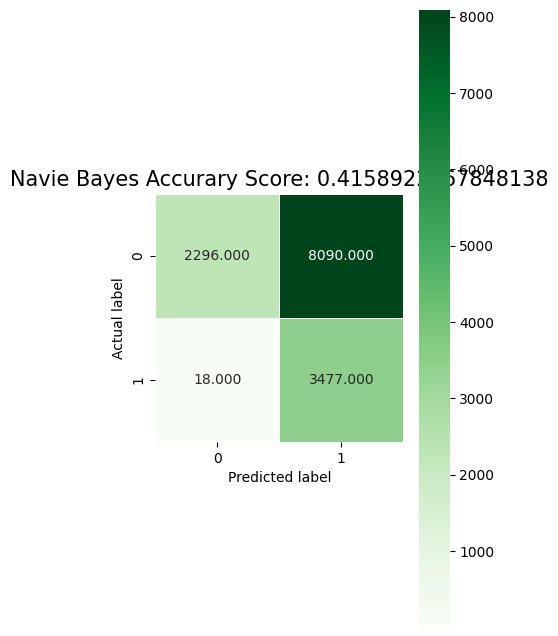

In [130]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
print('Nguyễn Thị Tường Vi - 6351071077')
plt.figure(figsize=(4,8))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Navie Bayes Accurary Score: {0}'.format(bayes_score)
plt.title(title, size = 15);